In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [2]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c playground-series-s3e10

 92% 8.00M/8.66M [00:01<00:00, 9.31MB/s]
100% 8.66M/8.66M [00:01<00:00, 5.17MB/s]


In [3]:
zip_ref = zipfile.ZipFile("/content/playground-series-s3e10.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
! wget https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/classification.py
! wget https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/model_data.py
! wget https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/helper_function.py

--2023-03-11 18:33:26--  https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/classification.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5105 (5.0K) [text/plain]
Saving to: ‘classification.py’

classification.py   100%[===================>]   4.99K  --.-KB/s    in 0s      

2023-03-11 18:33:27 (22.5 MB/s) - ‘classification.py’ saved [5105/5105]

--2023-03-11 18:33:27--  https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/model_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [5]:
from classification import Classification
from helper_function import show_confusion_matrix, plot_history
from model_data import ModelData

In [6]:
df = pd.read_csv("/content/train.csv")
df = ModelData(df)
df.head()

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0


In [7]:
df.dtypes()

id                        int64
Mean_Integrated         float64
SD                      float64
EK                      float64
Skewness                float64
Mean_DMSNR_Curve        float64
SD_DMSNR_Curve          float64
EK_DMSNR_Curve          float64
Skewness_DMSNR_Curve    float64
Class                     int64
dtype: object

In [8]:
df.columns()

Index(['id', 'Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class'],
      dtype='object')

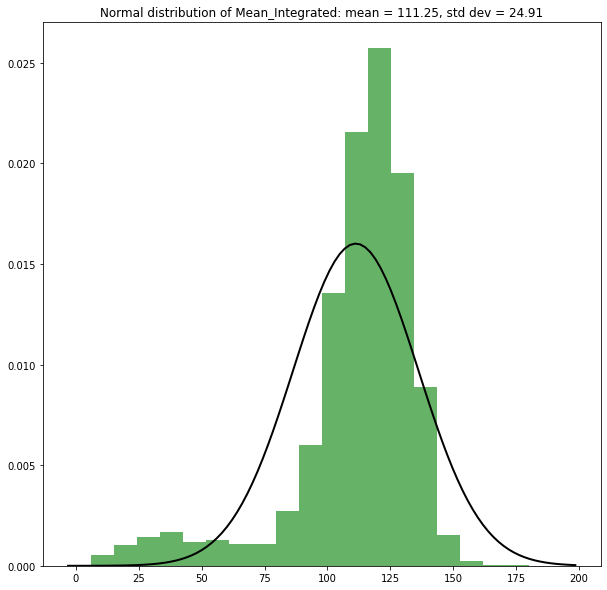

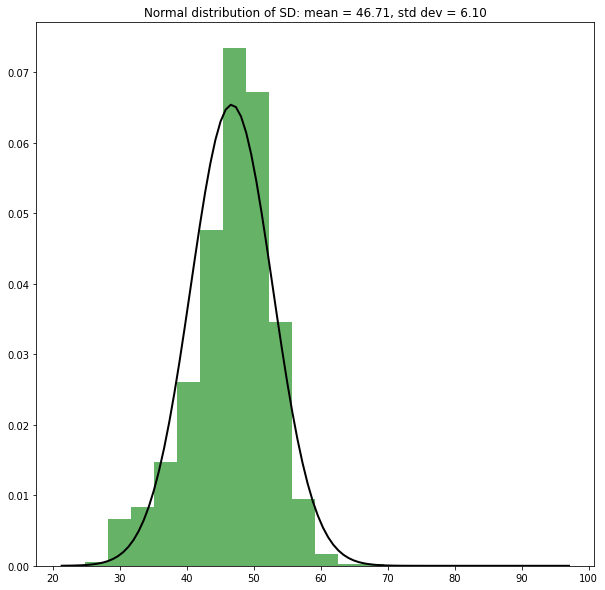

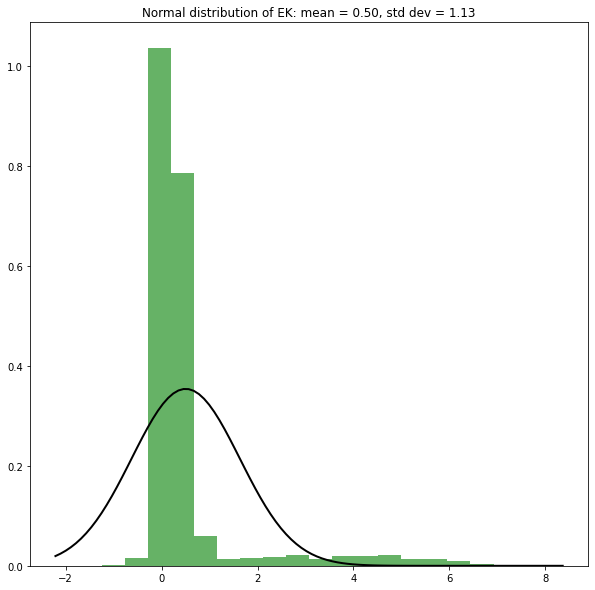

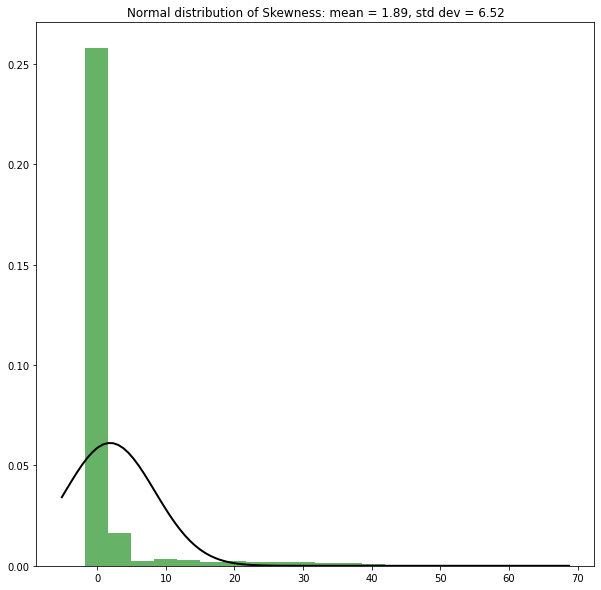

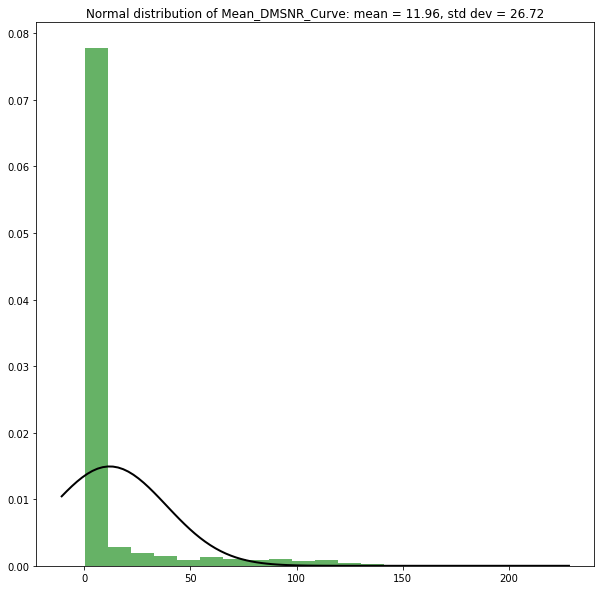

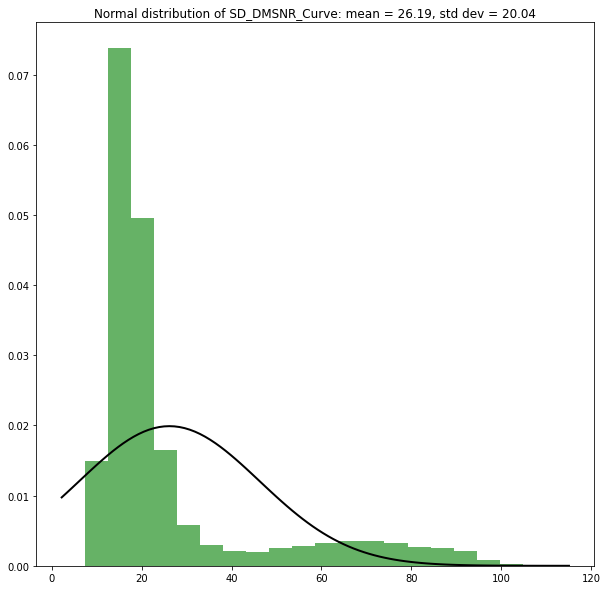

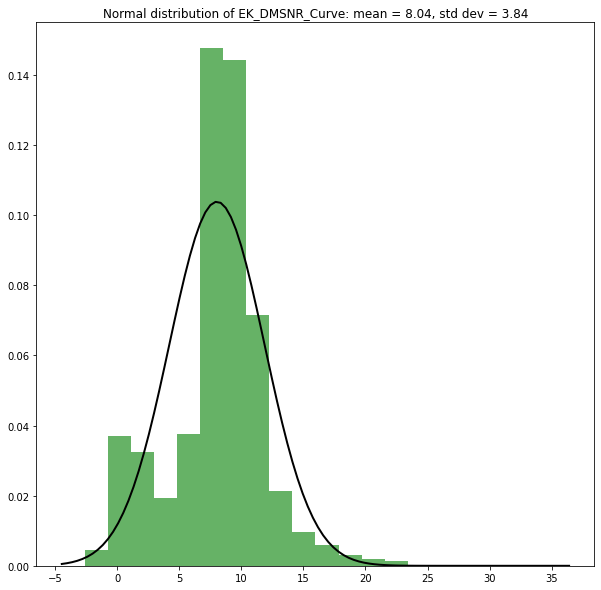

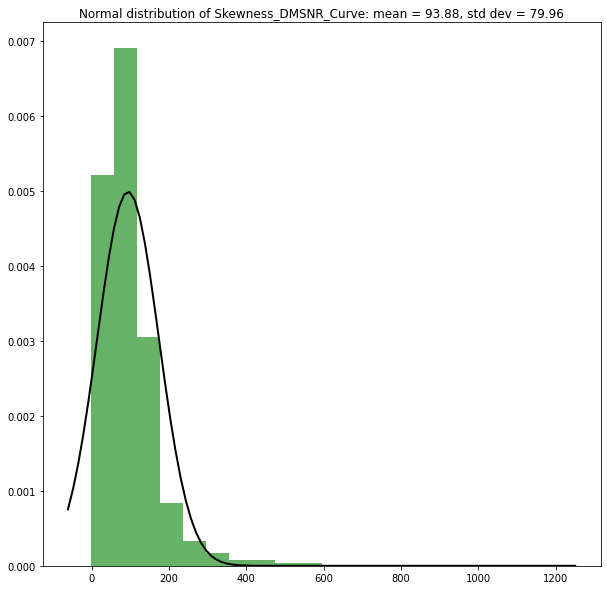

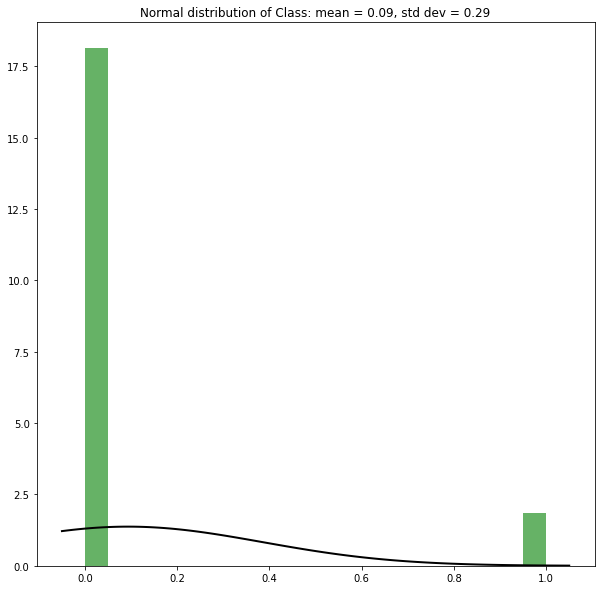

In [9]:
df.normal_distribution(['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class'])

In [6]:
def prepare_data_minmax(df):
  df = ModelData(df)
  df.drop("id")
  df.min_max_scaler(['EK','Skewness','Mean_DMSNR_Curve','SD_DMSNR_Curve'])
  df.standard_scaler(['Mean_Integrated','SD','EK_DMSNR_Curve','Skewness_DMSNR_Curve'])
  df = df.return_dataframe()
  return df

In [11]:
df = pd.read_csv("/content/train.csv")
df = prepare_data_minmax(df)
X = df.drop("Class", axis=1)
y = df["Class"]

model = Classification()
model.train_all_models(X,y,9000)

Best hyperparameters: {'alpha': 0.001, 'loss': 'modified_huber', 'max_iter': 5000, 'penalty': 'l1'}
SGD_model created
Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Linear_SVC created
Best hyperparameters: {'n_neighbors': 15, 'weights': 'distance'}
KNeighbours created
Best hyperparameters: {'C': 10, 'cache_size': 9000, 'gamma': 'scale', 'kernel': 'rbf'}
SVC created


In [12]:
model.compare_model_all(X,y)

,accuracy
Linear_SVC,1.000000
SGD_classifier,0.986807
KNeighbour,1.000000
SVC,0.990567


In [16]:
df = pd.read_csv("/content/test.csv")
df = prepare_data_minmax(df)
X = df
preds = model.evaluate_svc(X)


df_sub = pd.read_csv("/content/sample_submission.csv")
df_sub["Class"] = preds
df_sub.to_csv('data.csv', index=False)
from google.colab import files
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Deep learning

In [7]:
!wget https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/helper_function.py

--2023-03-11 18:33:39--  https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 920 [text/plain]
Saving to: ‘helper_function.py.1’

helper_function.py. 100%[===================>]     920  --.-KB/s    in 0s      

2023-03-11 18:33:39 (65.3 MB/s) - ‘helper_function.py.1’ saved [920/920]



In [8]:
from helper_function import show_confusion_matrix, plot_history

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/train.csv")
df = prepare_data_minmax(df)
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


model_1 = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(256,activation="elu"),
    tf.keras.layers.Dense(256, activation="elu"),

    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128,activation="elu"),
    tf.keras.layers.Dense(64, activation="elu"),

    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=1e-4),
                metrics=["accuracy"])


history_1 = model_1.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
2388/2388 [==============================] - 15s 5ms/step - loss: 0.0581 - accuracy: 0.9831 - val_loss: 0.0483 - val_accuracy: 0.9869
Epoch 2/100
2388/2388 [==============================] - 12s 5ms/step - loss: 0.0478 - accuracy: 0.9871 - val_loss: 0.0526 - val_accuracy: 0.9830
Epoch 3/100
2388/2388 [==============================] - 12s 5ms/step - loss: 0.0462 - accuracy: 0.9874 - val_loss: 0.0410 - val_accuracy: 0.9887
Epoch 4/100
2388/2388 [==============================] - 12s 5ms/step - loss: 0.0446 - accuracy: 0.9878 - val_loss: 0.0418 - val_accuracy: 0.9887
Epoch 5/100
2388/2388 [==============================] - 12s 5ms/step - loss: 0.0426 - accuracy: 0.9884 - val_loss: 0.0397 - val_accuracy: 0.9894
Epoch 6/100
2388/2388 [==============================] - 12s 5ms/step - loss: 0.0420 - accuracy: 0.9889 - val_loss: 0.0423 - val_accuracy: 0.9878
Epoch 7/100
2388/2388 [==============================] - 12s 5ms/step - loss: 0.0411 - accuracy: 0.9890 - val_loss: 0.0394 -

In [11]:
model_1.evaluate(X_test,y_test)

1286/1286 [==============================] - 4s 3ms/step - loss: 0.0407 - accuracy: 0.9899


[0.040677424520254135, 0.9899144768714905]

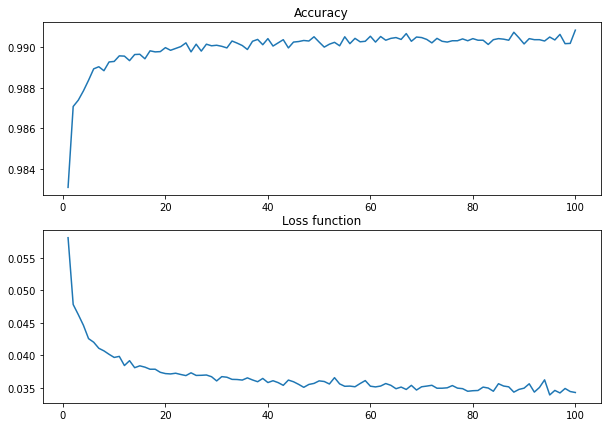

In [12]:
plot_history(history_1)

In [13]:
tf.squeeze(tf.round(model_1.predict(X)))

3674/3674 [==============================] - 6s 2ms/step


<tf.Tensor: shape=(117564,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

In [14]:
df = pd.read_csv("/content/test.csv")
df = prepare_data_minmax(df)
X = df
preds = tf.squeeze(tf.round(model_1.predict(X)))


df_sub = pd.read_csv("/content/sample_submission.csv")
df_sub["Class"] = preds
df_sub.to_csv('data.csv', index=False)
from google.colab import files
files.download('data.csv')

2450/2450 [==============================] - 4s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>